In [2]:
import os
import pandas as pd
import pcntoolkit as ptk
import numpy as np
import pickle
from matplotlib import pyplot as plt

In [71]:
allHC = pd.read_csv('/Volumes/QCI/NormativeModel/FeatureData/allHCfeature.csv')
anding = allHC.loc[allHC['site'] == 'anding']     # 获取site = "anding"
anding['sitenum'] = 0                             # 加一列，标识站点 - 0

allHC = allHC.loc[allHC['site'] != 'anding']     # 获取其他站点的数据(此时的allHC,从allHC中排除了anding 站点
sites = allHC['site'].unique()                   # 获取其他站点名称

allHC['sitenum'] = 0                             # 所有站点 标识为 - 0


     participant_id  age  sex    site  LH_Vis_1  LH_Vis_2  LH_Vis_3  LH_Vis_4  \
1076          HC001   22    2  anding  0.016782  0.007854  0.032804  0.030094   
1077          HC002   36    1  anding -0.012615 -0.049821  0.119106  0.014552   
1078          HC003   31    2  anding  0.000097  0.066777  0.030972 -0.062435   
1079          HC004   23    1  anding -0.014137 -0.018214 -0.023851 -0.027967   
1080          HC005   30    1  anding  0.004237 -0.003509  0.012525 -0.005679   
...             ...  ...  ...     ...       ...       ...       ...       ...   
1184          HC110   22    1  anding  0.094591  0.028502  0.068840  0.096579   
1185          HC111   21    2  anding -0.009974 -0.036120  0.073204  0.035446   
1186          HC112   21    2  anding -0.028685  0.005085  0.003255  0.005168   
1187          HC113   27    2  anding  0.158747  0.105212  0.138480  0.170459   
1188          HC114   24    1  anding -0.046880  0.075035 -0.044596 -0.062114   

      LH_Vis_5  LH_Vis_6  .

/var/folders/dh/dmftg40j21j249nqf2z5v2nh0000gn/T/ipykernel_92166/3596967063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anding['sitenum'] = 0                             # 加一列，标识站点 - 0


site hcp 1076


/var/folders/dh/dmftg40j21j249nqf2z5v2nh0000gn/T/ipykernel_92166/1862517469.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  allHC['sitenum'].loc[idx] = i                  # 为每一个站点进行标识 - 0 1 2 ...
/var/folders/dh/dmftg40j21j249nqf2z5v2nh0

Text(0.5, 0, 'age')

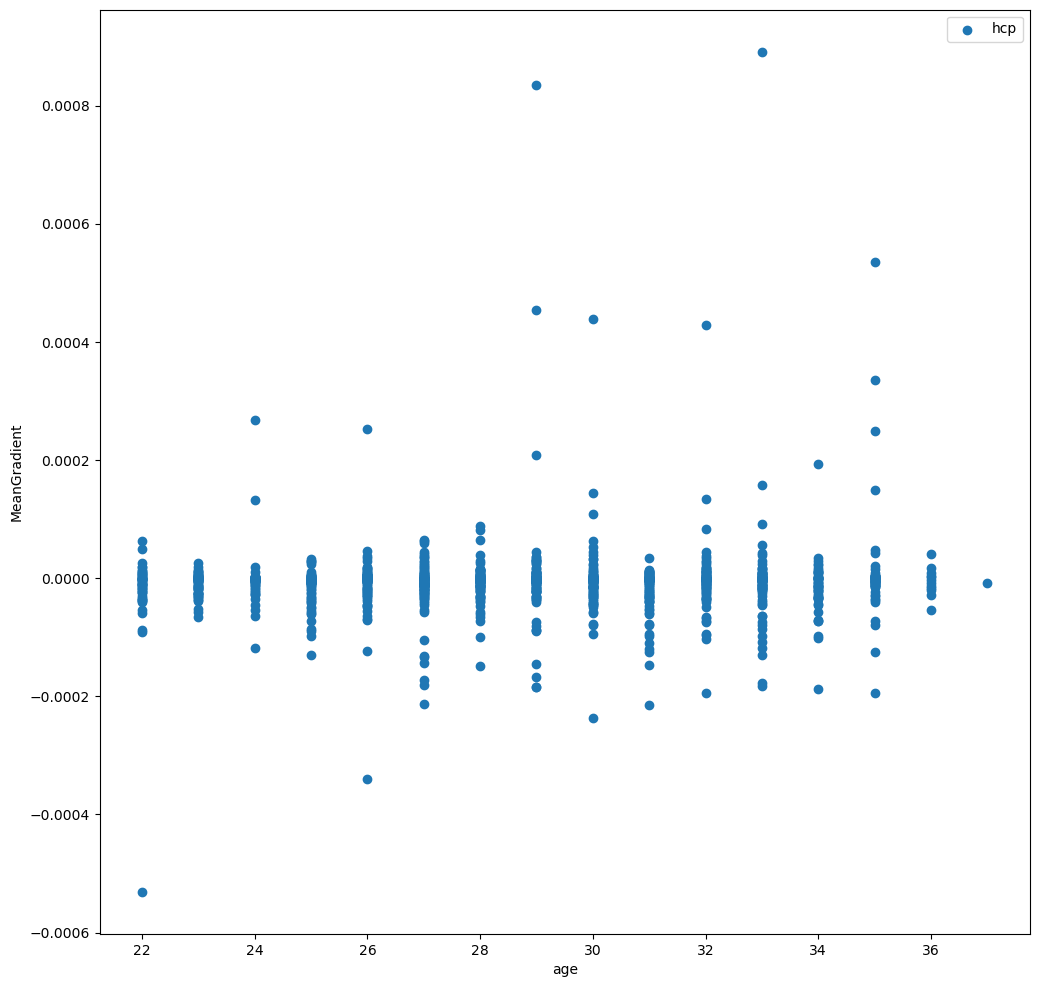

In [15]:
f, ax = plt.subplots(figsize=(12, 12))

for i,s in enumerate(sites):
    idx = allHC['site'] == s
    allHC['sitenum'].loc[idx] = i                  # 为每一个站点进行标识 - 0 1 2 ...

    print('site',s, sum(idx))
    ax.scatter(allHC['age'].loc[idx], allHC['MeanGradient'].loc[idx])

ax.legend(sites)
ax.set_ylabel('MeanGradient')
ax.set_xlabel('age')

In [72]:
tr = np.random.uniform(size=allHC.shape[0]) > 0.5  # 形成一个随机抽样
te = ~tr
allHC_tr = allHC.loc[tr]
allHC_te = allHC.loc[te]                            # 将fcon中数据一分为2 ture false

tr = np.random.uniform(size=anding.shape[0]) > 0.5  # 将anding 数据也形成一个随机抽样
te = ~tr

anding_tr = anding.loc[tr]
anding_te = anding.loc[te]

print('sample size check')
for i,s in enumerate(sites):
    idx = allHC_tr['site'] == s
    idxte = allHC_te['site'] == s
    print(i,s, sum(idx), sum(idxte))

     participant_id  age  sex site  LH_Vis_1  LH_Vis_2  LH_Vis_3  LH_Vis_4  \
0        sub-173839   22    2  hcp -0.031592 -0.044751 -0.018067 -0.031786   
1        sub-100206   27    1  hcp -0.031390 -0.047454  0.012314  0.012903   
2        sub-100307   27    2  hcp  0.018464  0.016179  0.010906  0.091619   
3        sub-100408   33    1  hcp  0.015888  0.024508  0.006799  0.014546   
4        sub-101006   35    2  hcp  0.007062  0.018179  0.004390  0.011662   
...             ...  ...  ...  ...       ...       ...       ...       ...   
1071     sub-943862   27    1  hcp -0.000600 -0.046196 -0.046308 -0.041802   
1072     sub-953764   32    2  hcp  0.080805  0.090789  0.023010  0.060265   
1073     sub-955465   27    1  hcp -0.036096 -0.042104 -0.036392 -0.055113   
1074     sub-957974   28    2  hcp -0.012435 -0.005141 -0.011886 -0.009561   
1075     sub-958976   29    1  hcp -0.069720 -0.056603 -0.066917 -0.050697   

      LH_Vis_5  LH_Vis_6  ...  RH_Default_pCunPCC_2  RH_Default

In [35]:
processing_dir = "/Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data"
if not os.path.isdir(processing_dir):
    os.mkdir(processing_dir)
allHC_tr.to_csv(processing_dir + '/allHC_tr.csv')
allHC_te.to_csv(processing_dir + '/allHC_te.csv')
anding_tr.to_csv(processing_dir + '/allHC_anding_tr.csv')
anding_te.to_csv(processing_dir + '/allHC_anding_te.csv')

In [65]:
idps = ['LH_Vis_21','LH_Vis_22','LH_Vis_23','LH_Vis_24','LH_Vis_25','LH_Vis_26',
        'LH_Vis_27','LH_Vis_28','LH_Vis_29','LH_Vis_30']


In [66]:
pro_dir = '/Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data/Result3/'
if not os.path.isdir(pro_dir):
    os.mkdir(pro_dir)
os.chdir(pro_dir)
pro_dir = os.getcwd()

X_train = (allHC_tr['age']/100).to_numpy(dtype=float)
print(X_train)
Y_train = allHC_tr[idps].to_numpy(dtype=float)
print(Y_train)
batch_effects_train = allHC_tr[['sitenum']].to_numpy(dtype=int)

with open('X_train.pkl', 'wb') as file:
    pickle.dump(pd.DataFrame(X_train), file)
with open('Y_train.pkl', 'wb') as file:
    pickle.dump(pd.DataFrame(Y_train), file)
with open('trbefile.pkl', 'wb') as file:
    pickle.dump(pd.DataFrame(batch_effects_train), file)

[0.27 0.33 0.35 0.22 0.29 0.29 0.27 0.26 0.26 0.3  0.3  0.34 0.25 0.32
 0.36 0.29 0.31 0.33 0.28 0.29 0.26 0.25 0.35 0.22 0.35 0.32 0.31 0.27
 0.28 0.31 0.29 0.29 0.28 0.32 0.34 0.23 0.25 0.27 0.23 0.25 0.33 0.25
 0.36 0.23 0.29 0.29 0.3  0.3  0.22 0.33 0.26 0.29 0.23 0.26 0.25 0.33
 0.26 0.28 0.26 0.29 0.26 0.32 0.33 0.31 0.29 0.26 0.35 0.29 0.28 0.22
 0.32 0.23 0.26 0.31 0.35 0.32 0.34 0.3  0.35 0.22 0.26 0.3  0.25 0.28
 0.28 0.3  0.25 0.29 0.27 0.27 0.29 0.31 0.26 0.23 0.27 0.32 0.31 0.22
 0.32 0.23 0.32 0.33 0.23 0.28 0.35 0.26 0.27 0.33 0.27 0.27 0.32 0.29
 0.26 0.23 0.27 0.26 0.34 0.27 0.28 0.32 0.29 0.31 0.28 0.33 0.27 0.25
 0.25 0.32 0.26 0.3  0.31 0.31 0.35 0.29 0.29 0.23 0.23 0.34 0.35 0.32
 0.28 0.27 0.25 0.34 0.29 0.3  0.33 0.24 0.33 0.32 0.27 0.31 0.24 0.28
 0.3  0.35 0.26 0.24 0.25 0.35 0.34 0.32 0.24 0.35 0.28 0.32 0.26 0.25
 0.26 0.32 0.22 0.28 0.33 0.29 0.27 0.28 0.3  0.23 0.31 0.31 0.27 0.32
 0.24 0.31 0.32 0.3  0.29 0.31 0.32 0.26 0.23 0.35 0.33 0.24 0.34 0.32
 0.27 

In [67]:
X_test = (allHC_te['age']/100).to_numpy(dtype=float)
Y_test = allHC_te[idps].to_numpy(dtype=float)

batch_effects_test = allHC_te[['sitenum']].to_numpy(dtype=int)
with open('X_test.pkl', 'wb') as file:
    pickle.dump(pd.DataFrame(X_test), file)
with open('Y_test.pkl', 'wb') as file:
    pickle.dump(pd.DataFrame(Y_test), file)
with open('tsbefile.pkl', 'wb') as file:
    pickle.dump(pd.DataFrame(batch_effects_test), file)

In [68]:
# a simple function to quickly load pickle files
def ldpkl(filename: str):
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [69]:
respfile = os.path.join(pro_dir, 'Y_train.pkl')       # measurements  (eg cortical thickness) of the training samples (columns: the various features/ROIs, rows: observations or subjects)
covfile = os.path.join(pro_dir, 'X_train.pkl')        # covariates (eg age) the training samples (columns: covariates, rows: observations or subjects)
testrespfile_path = os.path.join(pro_dir, 'Y_test.pkl')       # measurements  for the testing samples
testcovfile_path = os.path.join(pro_dir, 'X_test.pkl')        # covariate file for the testing samples

trbefile = os.path.join(pro_dir, 'trbefile.pkl')      # training batch effects file (eg scanner_id, gender)  (columns: the various batch effects, rows: observations or subjects)
tsbefile = os.path.join(pro_dir, 'tsbefile.pkl')      # testing batch effects file

output_path = os.path.join(pro_dir, 'Models/')    #  output path, where the models will be written

log_dir = os.path.join(pro_dir, 'log/')
if not os.path.isdir(output_path):
    os.mkdir(output_path)
if not os.path.isdir(log_dir):
    os.mkdir(log_dir)
outputsuffix = '_estimate'

In [70]:
ptk.normative.estimate(covfile=covfile,
                       respfile=respfile,
                       tsbefile=tsbefile,
                       trbefile=trbefile,
                       #inscaler='standardize',
                       #outscaler='standardize',
                       #linear_mu='True',
                       #random_intercept_mu='True',
                       #centered_intercept_mu='True',
                       alg='hbr',
                       log_path=log_dir,
                       binary=True,
                       output_path=output_path,
                       testcov= testcovfile_path,
                       testresp = testrespfile_path,
                       outputsuffix=outputsuffix,
                       savemodel=True)

Processing data in /Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data/Result3/Y_train.pkl
Estimating model  1 of 10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu_slope_mu, sigma_slope_mu, offset_slope_mu, mu_intercept_mu, sigma_intercept_mu, offset_intercept_mu, mu_sigma, sigma_sigma, sigma]


Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 112 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [y_like]


Estimating model  2 of 10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu_slope_mu, sigma_slope_mu, offset_slope_mu, mu_intercept_mu, sigma_intercept_mu, offset_intercept_mu, mu_sigma, sigma_sigma, sigma]


Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 31 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [y_like]


Estimating model  3 of 10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu_slope_mu, sigma_slope_mu, offset_slope_mu, mu_intercept_mu, sigma_intercept_mu, offset_intercept_mu, mu_sigma, sigma_sigma, sigma]


Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 136 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [y_like]


Estimating model  4 of 10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu_slope_mu, sigma_slope_mu, offset_slope_mu, mu_intercept_mu, sigma_intercept_mu, offset_intercept_mu, mu_sigma, sigma_sigma, sigma]


Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 114 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [y_like]


Estimating model  5 of 10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu_slope_mu, sigma_slope_mu, offset_slope_mu, mu_intercept_mu, sigma_intercept_mu, offset_intercept_mu, mu_sigma, sigma_sigma, sigma]


Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 67 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [y_like]


Estimating model  6 of 10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu_slope_mu, sigma_slope_mu, offset_slope_mu, mu_intercept_mu, sigma_intercept_mu, offset_intercept_mu, mu_sigma, sigma_sigma, sigma]


Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 137 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [y_like]


Estimating model  7 of 10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu_slope_mu, sigma_slope_mu, offset_slope_mu, mu_intercept_mu, sigma_intercept_mu, offset_intercept_mu, mu_sigma, sigma_sigma, sigma]


Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 119 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [y_like]


Estimating model  8 of 10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu_slope_mu, sigma_slope_mu, offset_slope_mu, mu_intercept_mu, sigma_intercept_mu, offset_intercept_mu, mu_sigma, sigma_sigma, sigma]


Sampling 1 chain for 500 tune and 964 draw iterations (500 + 964 draws total) took 115 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [y_like]


Estimating model  9 of 10



KeyboardInterrupt



In [53]:
X_adapt = (anding_tr['age']/100).to_numpy(dtype=float)
Y_adapt = anding_tr[idps].to_numpy(dtype=float)
#batch_effects_adapt = icbm_tr[['sitenum','sex']].to_numpy(dtype=int)
batch_effects_adapt = anding_tr[['sitenum']].to_numpy(dtype=int)

with open('X_adaptation.pkl', 'wb') as file:
    pickle.dump(pd.DataFrame(X_adapt), file)
with open('Y_adaptation.pkl', 'wb') as file:
    pickle.dump(pd.DataFrame(Y_adapt), file)
with open('adbefile.pkl', 'wb') as file:
    pickle.dump(pd.DataFrame(batch_effects_adapt), file)

# Test data (new dataset)
X_test_txfr = (anding_te['age']/100).to_numpy(dtype=float)
Y_test_txfr = anding_te[idps].to_numpy(dtype=float)
#batch_effects_test_txfr = icbm_te[['sitenum','sex']].to_numpy(dtype=int)
batch_effects_test_txfr = anding_te[['sitenum']].to_numpy(dtype=int)

with open('X_test_txfr.pkl', 'wb') as file:
    pickle.dump(pd.DataFrame(X_test_txfr), file)
with open('Y_test_txfr.pkl', 'wb') as file:
    pickle.dump(pd.DataFrame(Y_test_txfr), file)
with open('txbefile.pkl', 'wb') as file:
    pickle.dump(pd.DataFrame(batch_effects_test_txfr), file)

In [54]:
respfile = os.path.join(pro_dir, 'Y_adaptation.pkl')
covfile = os.path.join(pro_dir, 'X_adaptation.pkl')
testrespfile_path = os.path.join(pro_dir, 'Y_test_txfr.pkl')
testcovfile_path = os.path.join(pro_dir, 'X_test_txfr.pkl')
trbefile = os.path.join(pro_dir, 'adbefile.pkl')
tsbefile = os.path.join(pro_dir, 'txbefile.pkl')

log_dir = os.path.join(pro_dir, 'log_transfer/')
output_path = os.path.join(pro_dir, 'Transfer/')
model_path = os.path.join(pro_dir, 'Models/')  # path to the previously trained models
print(model_path)
outputsuffix = '_transfer'

/Users/qingchen/Documents/code/NormativeModelMDD/Step_4th_NormativeModel/Data/Result2/Models/


In [55]:
yhat, s2, z_scores = ptk.normative.transfer(covfile=covfile,
                                            respfile=respfile,
                                            tsbefile=tsbefile,
                                            trbefile=trbefile,
                                            #inscaler='standardize',
                                            #outscaler='standardize',
                                            #linear_mu='True',
                                            #random_intercept_mu='True',
                                            #centered_intercept_mu='True',
                                            model_path = model_path,
                                            alg='hbr',
                                            log_path=log_dir,
                                            binary=True,
                                            output_path=output_path,
                                            testcov= testcovfile_path,
                                            testresp = testrespfile_path,
                                            outputsuffix=outputsuffix,
                                            savemodel=True)

Loading data ...
Using HBR transform...
Transferring model  1 of 10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu_slope_mu, sigma_slope_mu, offset_slope_mu, mu_intercept_mu, sigma_intercept_mu, offset_intercept_mu, mu_sigma, sigma_sigma, sigma]


Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 22 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [y_like]


Using HBR transform...
Transferring model  2 of 10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu_slope_mu, sigma_slope_mu, offset_slope_mu, mu_intercept_mu, sigma_intercept_mu, offset_intercept_mu, mu_sigma, sigma_sigma, sigma]


Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 2 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [y_like]


Using HBR transform...
Transferring model  3 of 10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu_slope_mu, sigma_slope_mu, offset_slope_mu, mu_intercept_mu, sigma_intercept_mu, offset_intercept_mu, mu_sigma, sigma_sigma, sigma]


Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 25 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [y_like]


Using HBR transform...
Transferring model  4 of 10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu_slope_mu, sigma_slope_mu, offset_slope_mu, mu_intercept_mu, sigma_intercept_mu, offset_intercept_mu, mu_sigma, sigma_sigma, sigma]


Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 27 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [y_like]


Using HBR transform...
Transferring model  5 of 10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu_slope_mu, sigma_slope_mu, offset_slope_mu, mu_intercept_mu, sigma_intercept_mu, offset_intercept_mu, mu_sigma, sigma_sigma, sigma]


Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 28 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [y_like]


Using HBR transform...
Transferring model  6 of 10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu_slope_mu, sigma_slope_mu, offset_slope_mu, mu_intercept_mu, sigma_intercept_mu, offset_intercept_mu, mu_sigma, sigma_sigma, sigma]


Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 37 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [y_like]


Using HBR transform...
Transferring model  7 of 10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu_slope_mu, sigma_slope_mu, offset_slope_mu, mu_intercept_mu, sigma_intercept_mu, offset_intercept_mu, mu_sigma, sigma_sigma, sigma]


Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 24 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [y_like]


Using HBR transform...
Transferring model  8 of 10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu_slope_mu, sigma_slope_mu, offset_slope_mu, mu_intercept_mu, sigma_intercept_mu, offset_intercept_mu, mu_sigma, sigma_sigma, sigma]


Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 30 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [y_like]


Using HBR transform...
Transferring model  9 of 10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu_slope_mu, sigma_slope_mu, offset_slope_mu, mu_intercept_mu, sigma_intercept_mu, offset_intercept_mu, mu_sigma, sigma_sigma, sigma]


Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 23 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [y_like]


Using HBR transform...
Transferring model  10 of 10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu_slope_mu, sigma_slope_mu, offset_slope_mu, mu_intercept_mu, sigma_intercept_mu, offset_intercept_mu, mu_sigma, sigma_sigma, sigma]


Sampling 1 chain for 500 tune and 1_000 draw iterations (500 + 1_000 draws total) took 28 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [y_like]


Evaluating the model ...
Writing outputs ...


In [ ]:
RMSE = pd.read_pickle('RMSE_estimate.pkl')
print(RMSE)

In [ ]:
res = pd.read_pickle('RMSE_transfer.pkl')
print(res)

In [ ]:
rperson = pd.read_pickle('Rho_transfer.pkl')
print(rperson)

In [ ]:
smse = pd.read_pickle('SMSE_transfer.pkl')
print(smse)